In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv("../data/Social_Network_Ads.csv")

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()


In [9]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
classifier = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p=2) 

In [12]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[64,  4],
       [ 3, 29]])

In [22]:
from matplotlib.colors import ListedColormap 


In [18]:
X_set, y_set = X_train, y_train

In [19]:
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min() -1, stop=X_set[:,0].max() +1, step=0.1),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.1))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


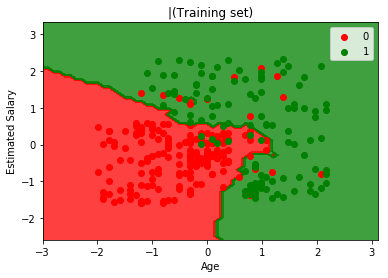

In [24]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i), label=j)
plt.title("|(Training set)")
plt.xlabel("Age")
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()